In [1]:
import sys
import collections
import itertools
import numpy as np
import scipy.misc as misc
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 15, 10

In [3]:
simplest_maze = np.array([
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0]
], dtype=int)


simple_maze = np.array([
[0, 0, 1, 0, 0],
[0, 1, 1, 0, 0],
[0, 1, 0, 0, 0],
[0, 1, 1, 0, 0],
[0, 0, 1, 0, 0]
], dtype=int)

twoway_maze = np.array([
[0, 0, 1, 0, 0],
[0, 1, 1, 1, 0],
[0, 1, 0, 1, 0],
[0, 1, 1, 0, 0],
[0, 0, 1, 0, 0]
], dtype=int)

In [4]:
def load_maze(filename):
    return np.array(plt.imread(filename).sum(axis=2) // 3, dtype=int)

def find_start(maze):
    return np.where(maze[0] == 1)[0][0]

def solve_maze_bruteforce(maze, DEBUG=False):
    def try_path(maze, i, j):
        if DEBUG:
            print(maze, i, j)
            input(">0>")

        copy = maze.copy()
        copy[i, j] = 2

        if i + 1 == maze.shape[0]:
            return (True, copy)

        options = ((i-1, j), (i+1, j), (i, j-1), (i, j+1))
        for k, l in options:
            if DEBUG:
                print(f"ij-loop k = {k}, l = {l}")
                input(">1>")
            if k >= 0 and k < maze.shape[0] and l >= 0 and l < maze.shape[1] and copy[k, l] == 1:
                found_exit, modified_maze = try_path(copy, k, l)
                if found_exit:
                    return (found_exit, modified_maze)

        return (False, copy)
        
    copy = maze.copy()
    j0   = find_start(maze)
    copy[0, j0] = 2
    found_exit, solved_maze = try_path(maze, 0, j0)
    if found_exit:
        return solved_maze
    print("Could not find an exit")

In [5]:
solve_maze_bruteforce(simplest_maze)

array([[0, 0, 2, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 2, 0, 0]])

In [6]:
solve_maze_bruteforce(simple_maze)

array([[0, 0, 2, 0, 0],
       [0, 2, 2, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 2, 2, 0, 0],
       [0, 0, 2, 0, 0]])

In [7]:
solve_maze_bruteforce(twoway_maze)

array([[0, 0, 2, 0, 0],
       [0, 2, 2, 1, 0],
       [0, 2, 0, 1, 0],
       [0, 2, 2, 0, 0],
       [0, 0, 2, 0, 0]])

In [27]:
def plot_maze(maze):
    plt.imshow(np.abs(maze - 1), cmap=plt.cm.binary, interpolation='nearest')

def plot_solution(solved):
    x, y = np.where(solved == 2)
    figmax = max(plt.gcf().bbox_inches.bounds)
    matmax = max(solved.shape)
    plt.scatter(y, x, s=200*figmax/matmax, color="r")

def empty_maze(height, width, wall=0):
    make  = np.zeros if wall else np.ones
    maze  = make((height, width), dtype=int)
    evens = np.arange(0, height, 2)
    maze[evens, :] = wall
    evens = np.arange(0,  width, 2)
    maze[:, evens] = wall
    return maze

def find_neighbors(visited, i, j):
    def within_maze(ij):
        i, j = ij
        h, w = visited.shape
        return i >= 0 and i < h and j >= 0 and j < w

    options     = (i, j-2), (i, j+2), (i-2, j), (i+2, j)
    within_maze = filter(within_maze, options)
    return list(itertools.filterfalse(visited.__getitem__, within_maze))

def generate_random_odd(min, max, *args, **kwargs):
    out = 0
    while not out % 2:
        out = np.random.randint(min, max)
    return out

def find_wall(i, j, k, l):
    delta_ik = k - i
    delta_jl = l - j
    if       delta_ik and not delta_jl:
        delta_ik //= abs(delta_ik)
        return i + delta_ik, j
    elif not delta_ik and     delta_jl:
        delta_jl //= abs(delta_jl)
        return i, j + delta_jl
    else:
        raise ValueError

def generate_maze_recursive_backtracker(height=51, width=51):
    assert height % 2 and width % 2

    maze    = empty_maze(height, width, wall=0)
    visited = empty_maze(height, width, wall=1).astype(bool)
    begin   = generate_random_odd(1, width - 1)

    maze   [0, begin] = 1
    visited[1, begin] = True
    current_i = 1
    current_j = begin
    stack     = []

    while not np.all(visited):
#        print(maze)
        neighbors = find_neighbors(visited, current_i, current_j)
        if neighbors:
            stack.append((current_i, current_j))
            neighbor = neighbors[np.random.choice(len(neighbors))]
            wall     = find_wall(current_i, current_j, *neighbor)
            maze   [wall    ] = 1
            visited[wall    ] = True
            visited[neighbor] = True
            
            current_i, current_j = neighbor
        elif stack:
            current_i, current_j = stack.pop()

    # Create exit
    index = np.random.choice(np.where(maze[-2])[0])
    maze[-1, index] = 1
    return maze

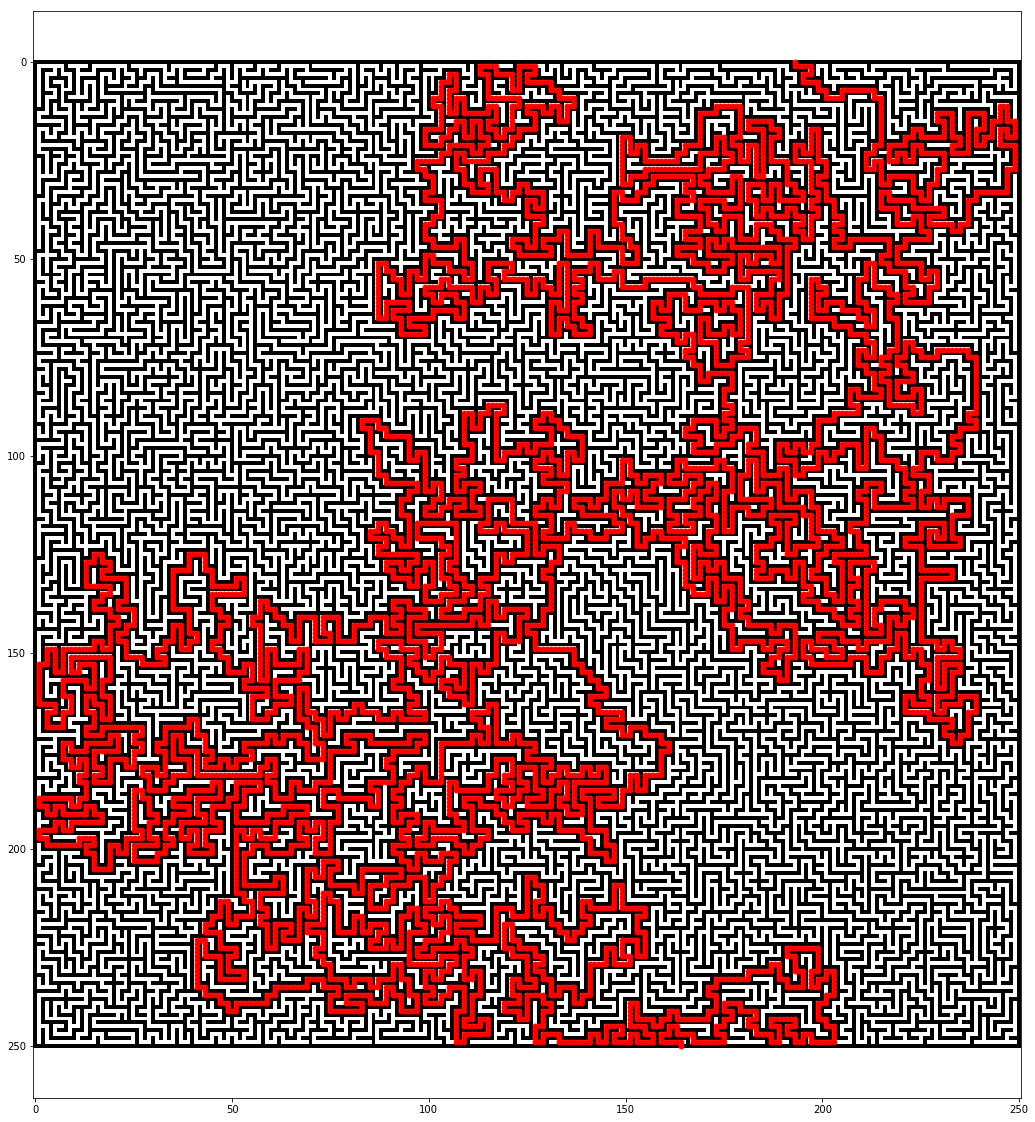

In [31]:
sys.setrecursionlimit(15000)
maze = generate_maze_recursive_backtracker(251, 251)
plt.figure(figsize=(30, 20))
plot_maze(maze)
solved = solve_maze_bruteforce(maze)
plot_solution(solved)

In [18]:
f = plt.figure()

In [20]:
f.bbox_inches.bounds

(0.0, 0.0, 15.0, 10.0)